<a href="https://colab.research.google.com/github/ismailehasan1/U.S.-Monthly-Wind-Power-Production-Forecasting/blob/main/Wind_power_production_in_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("zoo"):
“installation of package ‘zoo’ had non-zero exit status”


In [3]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [5]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [6]:
library(zoo)
library(ggplot2)
library(ggpubr)
library(forecast)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:ggpubr’:

    gghistogram




In [7]:
# For CSV files:
data <- read.csv("/wind-power-production-us.csv")

In [8]:
dim(data)

[1] 266 126

$title
[1] "Wind Power production in USA in 2001 to 2023"

attr(,"class")
[1] "labels"

<ScaleContinuousPosition>
 Range:  
 Limits: 2e+03 -- 2.02e+03

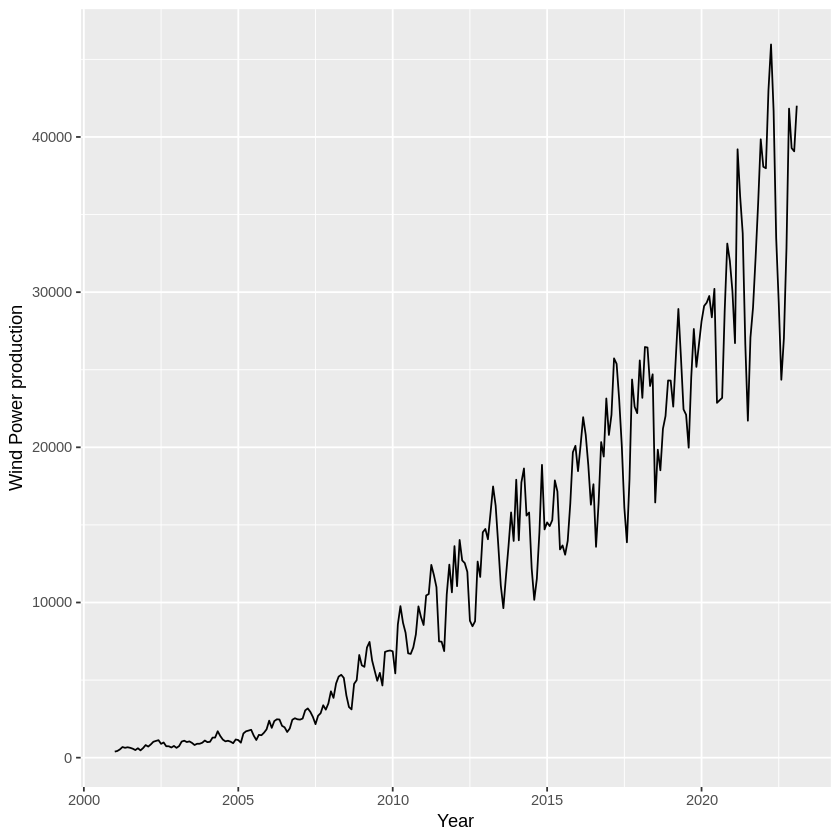

In [9]:

wind_power_production <- ts(data$wind_united_states, start = c(2001, 1), freq = 12)
wind_power_production_log <- ts(log(data$wind_united_states), start = c(2001, 1), freq = 12)

fig_1 <- autoplot.zoo(wind_power_production) +
  xlab("Year")+
  ylab("Wind Power production")
ggtitle("Wind Power production in USA in 2001 to 2023")
xlim(2001, 2023+2/12)
plot(fig_1)

$title
[1] "Log-transformed Wind Power production in USA in 2001 to 2023"

attr(,"class")
[1] "labels"

<ScaleContinuousPosition>
 Range:  
 Limits: 2e+03 -- 2.02e+03

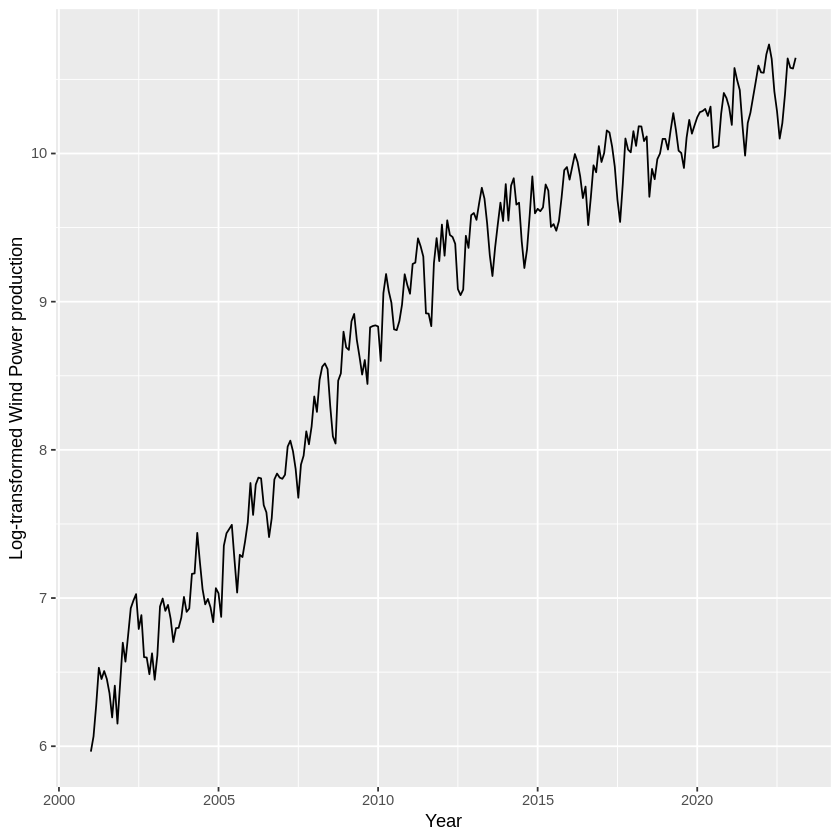

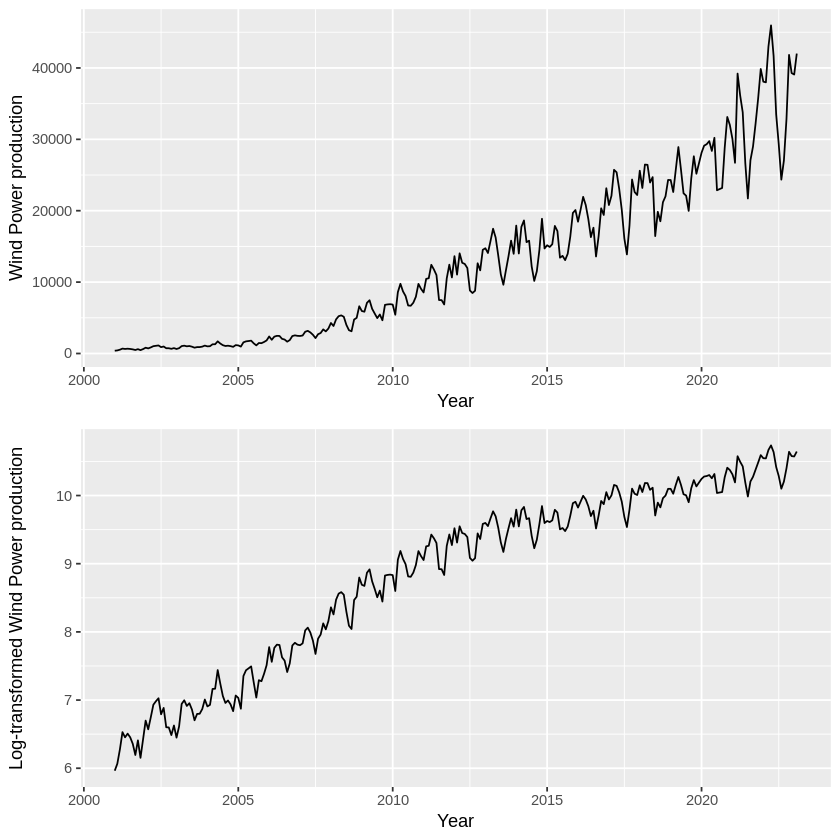

In [10]:

fig_2 <- autoplot.zoo(wind_power_production_log) +
  xlab("Year")+
  ylab("Log-transformed Wind Power production")
ggtitle("Log-transformed Wind Power production in USA in 2001 to 2023")
xlim(2001, 2023+2/12)
plot(fig_2)

plot_wind <- ggarrange(fig_1, fig_2, nrow = 2, ncol = 1, align = "v")
plot_wind


In [11]:
# Install the 'smoots' package
install.packages("smoots")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘globals’, ‘listenv’, ‘parallelly’, ‘future’, ‘future.apply’, ‘progressr’




In [13]:
library(smoots)
library(forecast)

********************************************************************************

                        Welcome to the package 'smoots'!

********************************************************************************



Please report any possible errors and bugs to dominik.schulz@uni-paderborn.de.

Thank you.



********************************************************************************



In [14]:
ts_zoo <- zoo(wind_power_production_log)
rate <- as.ts(ts_zoo)

est <- msmooth(rate)
bwidth <- est$b0
bwidth


[1] 0.1197724

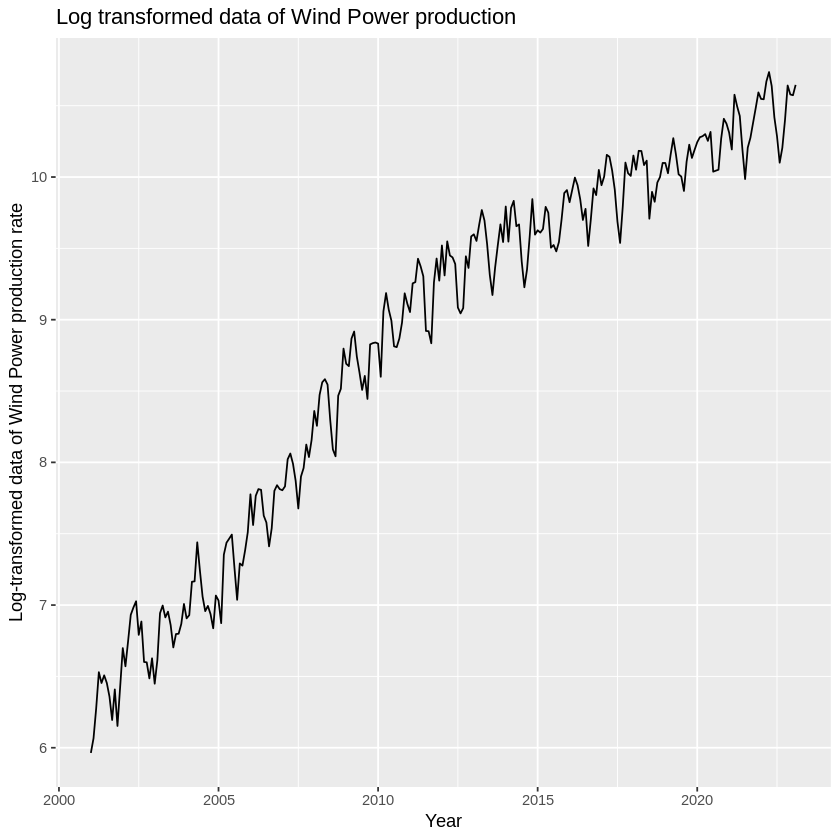

In [15]:

plot_rate <- autoplot.zoo(rate) +
  xlab("Year") +
  ylab("Log-transformed data of Wind Power production rate") +
  ggtitle("Log transformed data of Wind Power production")
plot(plot_rate)

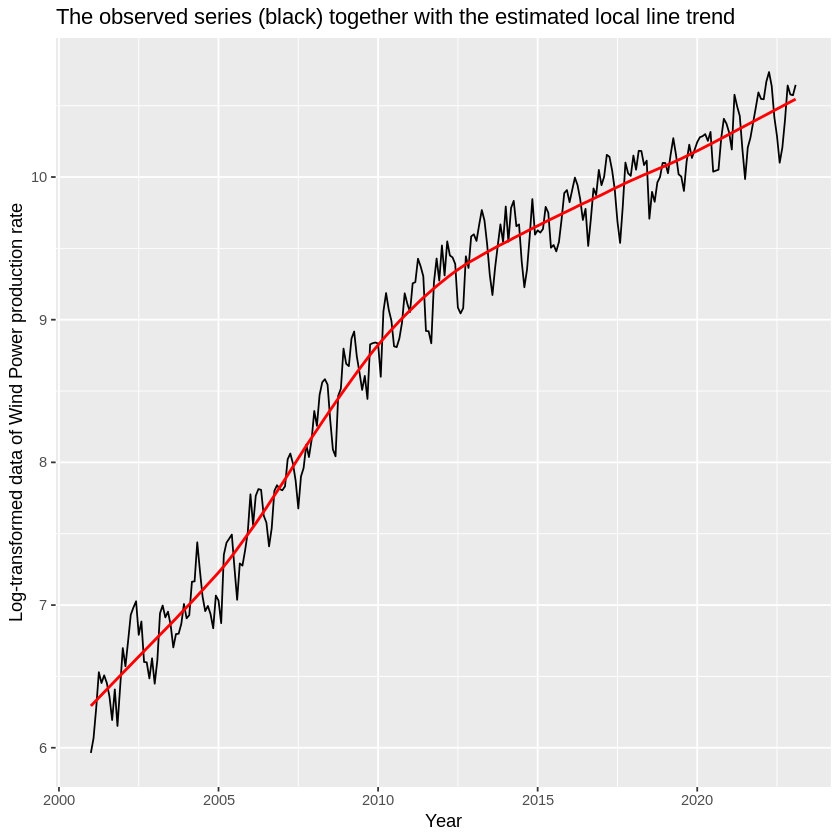

In [16]:

trend <- fitted(est)
df <- data.frame(
  t = time(rate),
  trend = trend
)

plot_trend <- plot_rate +
  geom_line(data = df, aes(x = t, y = trend), color = "red", linewidth = 0.8) +
  ggtitle("The observed series (black) together with the estimated local line trend")

plot_trend

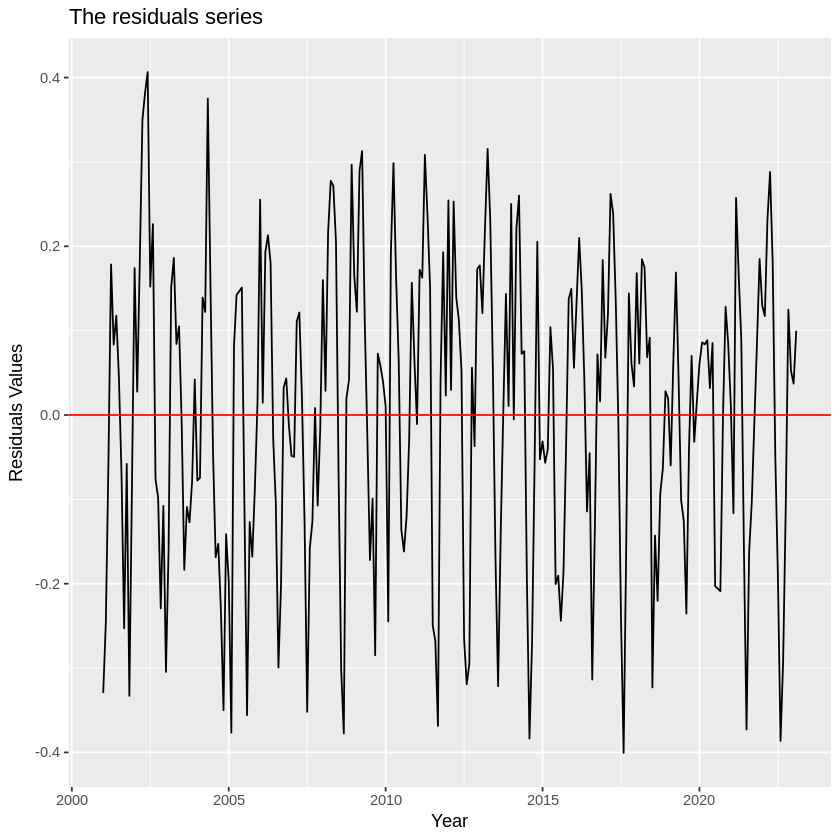

In [18]:
res <- resid(est)
plot_residuals <- autoplot.zoo(res) +
  xlab("Year") +
  ylab("Residuals Values")+
ggtitle("The residuals series")+
  geom_hline(yintercept = 0, color ="red")
plot_residuals



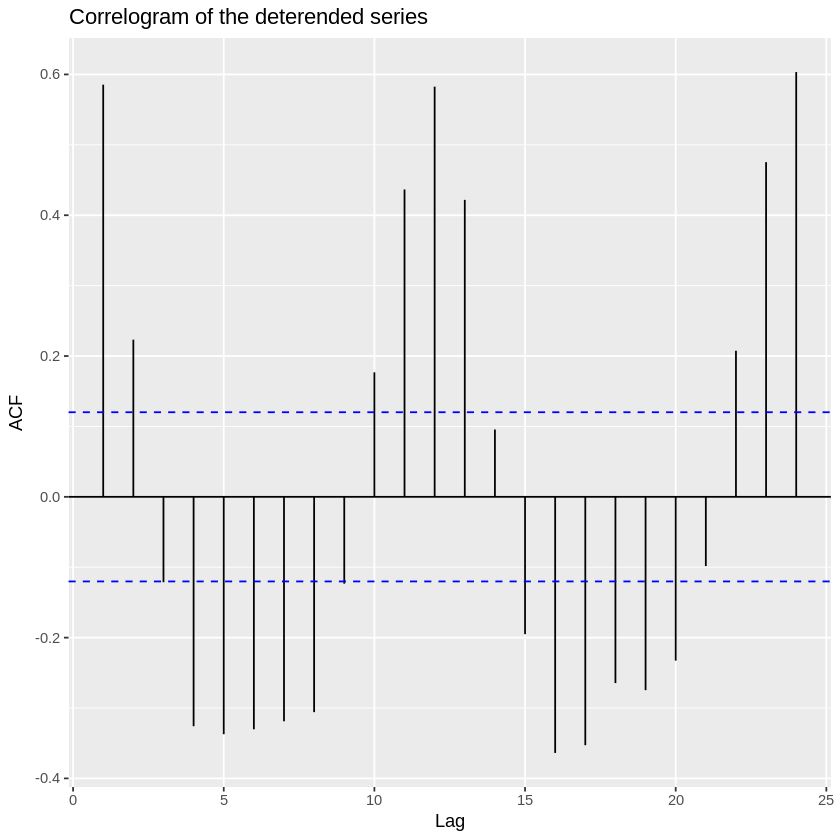

In [19]:
acf <- ggAcf(as.numeric(res))+
  ggtitle("Correlogram of the deterended series")

acf

In [20]:

p_max <- q_max <- 2
p <- 0:p_max
q <- 0:q_max
bic <- matrix(NA, nrow = p_max + 1, ncol = q_max + 1)
rownames(bic) <- paste0("p=", p)
colnames(bic) <-  paste0("q=", q)
n <- length(res)

for (p0 in p) {
  for (q0 in q) {
    arma <- arima(res, order = c(p0, 0, q0), include.mean = FALSE)
    bic[(p0 + 1), (q0 + 1)] <- AIC(arma, k = log(n))
  }

}
bic

,q=0,q=1,q=2
p=0,-159.4106,-247.2964,-269.9732
p=1,-267.1888,-266.4221,-270.3500
p=2,-270.5711,-296.2537,-280.4585


In [21]:
pq_opt <- unname(which(bic == min(bic), arr.ind = TRUE) - 1)
p_opt <- pq_opt[[1]]
q_opt <- pq_opt[[2]]
p_opt
q_opt


arma_opt <- arima(res,order = c(p_opt, 0, q_opt), include.mean = FALSE)
arma_opt


[1] 2

[1] 1


Call:
arima(x = res, order = c(p_opt, 0, q_opt), include.mean = FALSE)

Coefficients:
         ar1      ar2      ma1
      1.4202  -0.6571  -0.7905
s.e.  0.0574   0.0467   0.0536

sigma^2 estimated as 0.01761:  log likelihood = 159.29,  aic = -310.59

In [22]:

n <- length(wind_power_production)    # Number of observations
# Number of test observations
n_te <- trunc(0.1 * n)
# Number of training observations
n_tr <- n - n_te

# Absolute bandwidth
b_abs <- trunc(est$b0 * n_tr + 0.5)
# Readjusted relative bandwidth for complete data
b_n <- b_abs / n



In [23]:
est_n <- gsmooth(wind_power_production_log, b = b_n)
arma_n <- Arima(est_n$res, order = c(p_opt, 0, q_opt), include.mean = FALSE)
arma_n

arma_res <- arma_n$residuals


Series: est_n$res 
ARIMA(2,0,1) with zero mean 

Coefficients:
         ar1      ar2      ma1
      1.4288  -0.6616  -0.8169
s.e.  0.0556   0.0462   0.0513

sigma^2 = 0.01756:  log likelihood = 161.18
AIC=-314.36   AICc=-314.21   BIC=-300.03

In [24]:
library(tseries)

In [25]:
jarque.bera.test(res)

# A bootstrap requires setting a seed for reproducibility

set.seed(123)

#Forecast for the parametic part
fc_para <- forecast(arma_n, h = 30, bootstrap = TRUE, level = 95)


# Forecast for the non-parametic part
fc_trend <- tail(est_n$ye, 1) + (1:30) * diff(tail(est_n$ye, 2))

# Forecast according to the complete model
fc_point <- exp(fc_para$mean + fc_trend)
fc_low <- exp(fc_para$lower + fc_trend)
fc_up <- exp(fc_para$upper + fc_trend)



	Jarque Bera Test

data:  res
X-squared = 7.354, df = 2, p-value = 0.0253


In [26]:

# data with the results

df <- data.frame(
   Year = c(time(fc_point)),
            fc_point = c(fc_point),
            fc_low = c(fc_low),
            fc_up = c(fc_up)
          )
df


Year,fc_point,fc_low,fc_up
<dbl>,<dbl>,<dbl>,<dbl>
2023.167,41738.91,32397.82,54226.89
2023.250,40961.30,30230.83,55421.91
2023.333,40144.48,29483.56,54471.53
2023.417,39587.46,29098.75,54018.95
2023.500,39418.73,28659.62,54126.67
2023.583,39636.42,28482.67,55673.01
2023.667,40157.51,28454.03,56372.75
2023.750,40861.71,28781.24,57576.95
2023.833,41627.31,29412.00,59147.06


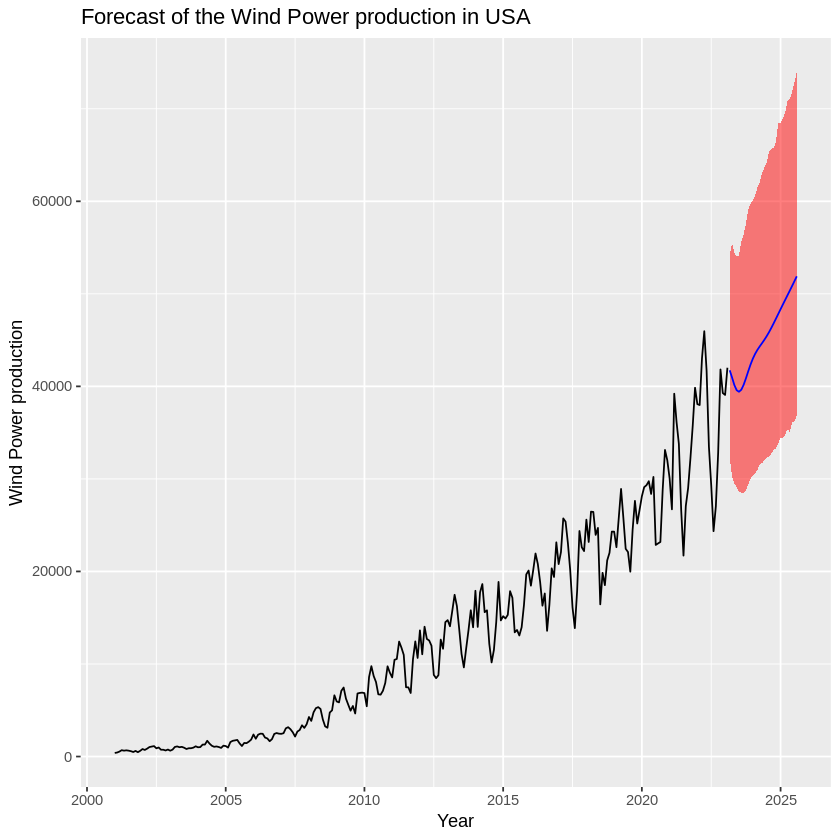

In [30]:
# Plot the original series with point and interval forecast at the end

autoplot.zoo(wind_power_production) +
  geom_ribbon(
    data = df,
    aes(x= Year, ymin = fc_low, ymax = fc_up),
    fill = alpha("red", 0.5)
  ) +
  geom_line(data = df, aes(x = Year, y = fc_point), color = "blue") +
  ggtitle("Forecast of the Wind Power production in USA") +
  xlab("Year") +
  ylab("Wind Power production")



In [34]:
# Forecast for the whole Semi-Arima model

fc_mc <- exp(modelCast(est_n, p = p_opt, q = q_opt, h = 30,
                       method = "boot"))
fc_mc


> fc_mc                                                                        
           k=1      k=2      k=3      k=4      k=5      k=6      k=7      k=8
fcast 41738.91 40961.30 40144.48 39587.46 39418.73 39636.42 40157.51 40861.71
2.5%  32291.26 30198.07 29252.98 29056.18 29008.44 28660.69 28554.67 29102.28
97.5% 54156.14 55396.40 54826.09 53440.11 54168.63 54890.36 55984.71 57969.76
           k=9     k=10     k=11     k=12     k=13     k=14     k=15     k=16
fcast 41627.31 42357.43 42994.46 43521.79 43955.12 44328.38 44679.65 45040.71
2.5%  29476.51 30183.61 30705.08 30721.84 31121.34 31337.16 31640.98 31827.10
97.5% 58654.27 59840.83 60446.64 61432.85 62519.89 63014.32 63399.38 63442.82
          k=17     k=18     k=19    k=20     k=21     k=22     k=23     k=24
fcast 45431.72 45860.37 46324.27 46814.8 47321.09 47833.32 48344.59 48851.64
2.5%  32483.71 32607.08 32757.97 32958.5 33423.35 33682.68 34089.83 34676.09
97.5% 64024.69 64531.82 65364.82 65946.2 66354.86 67322.45 67270.84 69263.15
          k=25     k=26     k=27     k=28     k=29     k=30
fcast 49354.41 49855.05 50356.70 50862.45 51374.67 51894.69
2.5%  34811.01 35380.08 35658.78 35809.58 36091.07 36800.23
97.5% 69410.60 70357.82 71031.21 71877.34 72311.76 72944.38> fc_mc                                                                        
           k=1      k=2      k=3      k=4      k=5      k=6      k=7      k=8
fcast 41738.91 40961.30 40144.48 39587.46 39418.73 39636.42 40157.51 40861.71
2.5%  32291.26 30198.07 29252.98 29056.18 29008.44 28660.69 28554.67 29102.28
97.5% 54156.14 55396.40 54826.09 53440.11 54168.63 54890.36 55984.71 57969.76
           k=9     k=10     k=11     k=12     k=13     k=14     k=15     k=16
fcast 41627.31 42357.43 42994.46 43521.79 43955.12 44328.38 44679.65 45040.71
2.5%  29476.51 30183.61 30705.08 30721.84 31121.34 31337.16 31640.98 31827.10
97.5% 58654.27 59840.83 60446.64 61432.85 62519.89 63014.32 63399.38 63442.82
          k=17     k=18     k=19    k=20     k=21     k=22     k=23     k=24
fcast 45431.72 45860.37 46324.27 46814.8 47321.09 47833.32 48344.59 48851.64
2.5%  32483.71 32607.08 32757.97 32958.5 33423.35 33682.68 34089.83 34676.09
97.5% 64024.69 64531.82 65364.82 65946.2 66354.86 67322.45 67270.84 69263.15
          k=25     k=26     k=27     k=28     k=29     k=30
fcast 49354.41 49855.05 50356.70 50862.45 51374.67 51894.69
2.5%  34811.01 35380.08 35658.78 35809.58 36091.07 36800.23
97.5% 69410.60 70357.82 71031.21 71877.34 72311.76 72944.38